In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from main_hopfield import parse_file
import pandas as pd
import itertools

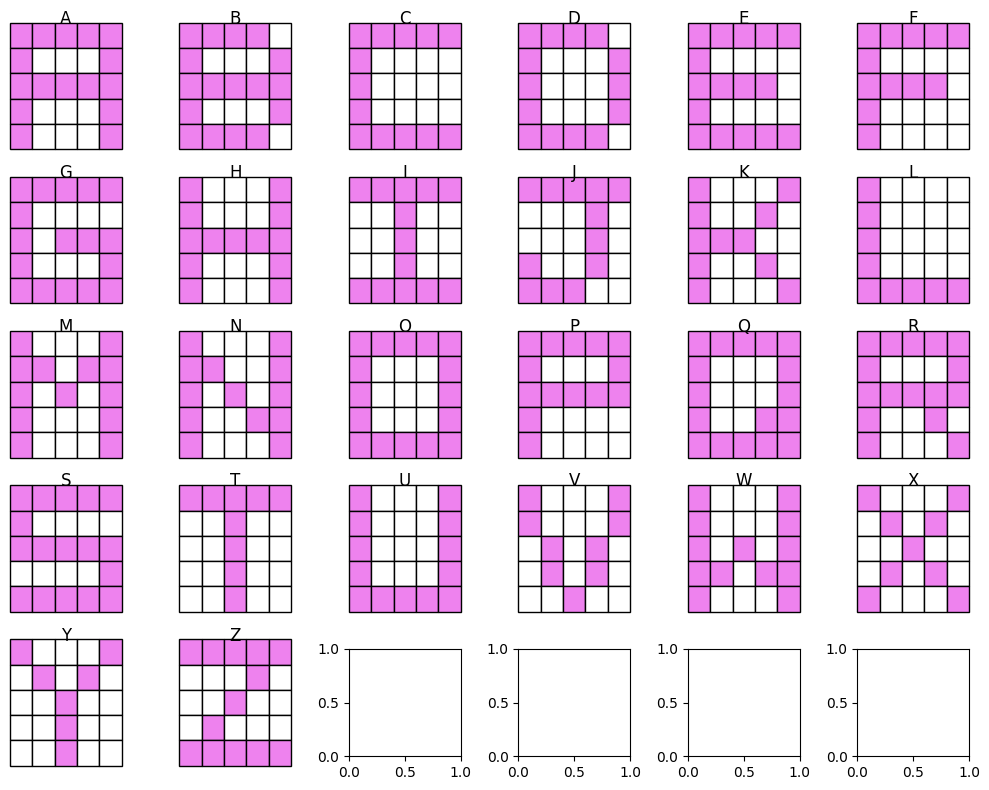

In [2]:

# Leer el archivo letras.txt y convertirlo en una matriz
with open('docs/letters.txt', 'r') as file:
    content = file.readlines()

letter_matrix = []
for line in content:
    row = list(map(int, line.split()))
    letter_matrix.append(row)

# Configuración de la figura y ejes de subtramas
fig, axs = plt.subplots(5, 6, figsize=(10, 8))

# Recorrer cada letra y mostrarla en subtramas individuales
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i, ax in enumerate(axs.flat):
    if i < len(letters):
        letter = letters[i]
        matrix = np.array(letter_matrix[i*5:(i+1)*5])

        # Crear el gráfico de la matriz con divisiones entre celdas
        num_rows, num_columns = matrix.shape
        colors = [['violet' if val == 1 else 'white' for val in row] for row in matrix]

        if num_columns > 0:
            ax.axis('off')
            table = ax.table(cellText=None, cellColours=colors, cellLoc='center', loc='center')
            table.scale(1, 1.5)
            table.auto_set_font_size(False)
            table.set_fontsize(14)
            ax.axis('off')

        ax.set_title(letter)

# Ajustar los espacios entre las subtramas y mostrar el gráfico
plt.tight_layout()
plt.show()


In [15]:
letters = parse_file()

letters_dict = {}
current_letter = 65
for letter in letters:
    letters_dict[chr(current_letter)] = letter
    current_letter += 1

all_groups = list(itertools.combinations(letters_dict.keys(), r=4))
avg_dot_product = []
max_dot_product = []

for i in range(len(all_groups)):
    group = np.array([v for k,v in letters_dict.items() if k in all_groups[i]])
    orto_matrix = group.dot(group.T)
    np.fill_diagonal(orto_matrix, 0)
    #print(f'{all_groups[i]}\n{orto_matrix}\n-------------------------------------')
    row, _ = orto_matrix.shape
    avg_dot_product.append((np.abs(orto_matrix).sum() / (orto_matrix.size - row), all_groups[i]))
    max_v = np.abs(orto_matrix).max()
    max_dot_product.append(((max_v, np.count_nonzero(np.abs(orto_matrix) == max_v) / 2), all_groups[i]))

df = pd.DataFrame(sorted(avg_dot_product), columns=["|<,>| medio", "grupo"])
df.head(15).style.format({'|<,>| medio': "{:.2f}"}).hide(axis='index')

"|<,>| medio",grupo
1.33,"('A', 'L', 'T', 'V')"
1.33,"('E', 'T', 'V', 'W')"
1.33,"('L', 'R', 'T', 'X')"
1.33,"('R', 'T', 'V', 'W')"
1.67,"('A', 'J', 'L', 'V')"
1.67,"('A', 'T', 'V', 'W')"
1.67,"('B', 'T', 'V', 'W')"
1.67,"('F', 'I', 'U', 'X')"
1.67,"('I', 'L', 'R', 'X')"
1.67,"('I', 'R', 'U', 'X')"


In [16]:
df.tail(15).style.format({'|<,>| medio': "{:.2f}"}).hide(axis='index')


"|<,>| medio",grupo
17.33,"('C', 'G', 'O', 'S')"
17.67,"('B', 'E', 'G', 'S')"
17.67,"('C', 'D', 'G', 'O')"
17.67,"('C', 'E', 'G', 'O')"
17.67,"('E', 'G', 'O', 'S')"
18.00,"('C', 'E', 'G', 'S')"
18.00,"('C', 'O', 'Q', 'U')"
18.00,"('G', 'O', 'Q', 'S')"
18.00,"('G', 'O', 'Q', 'U')"
18.67,"('A', 'H', 'P', 'R')"


In [17]:
df2 = pd.DataFrame(sorted(max_dot_product), columns=["|<,>| max", "grupo"])
df2.head(15).style.format({'|<,>| max': lambda x: 'max: {:,.0f} | count: {:,.0f}'.format(*x)}).hide(axis='index')

"|<,>| max",grupo
max: 3 | count: 1,"('A', 'L', 'T', 'V')"
max: 3 | count: 1,"('E', 'T', 'V', 'W')"
max: 3 | count: 1,"('L', 'R', 'T', 'X')"
max: 3 | count: 1,"('R', 'T', 'V', 'W')"
max: 3 | count: 2,"('A', 'J', 'L', 'V')"
max: 3 | count: 2,"('F', 'I', 'U', 'X')"
max: 3 | count: 2,"('I', 'R', 'U', 'X')"
max: 3 | count: 2,"('L', 'R', 'T', 'V')"
max: 3 | count: 2,"('S', 'T', 'V', 'W')"
max: 3 | count: 3,"('F', 'U', 'V', 'Z')"


In [18]:
df3 = df2.merge(df)
df3 = df3[['|<,>| max', '|<,>| medio', 'grupo']]
df3.head(15).style.format({'|<,>| max': lambda x: 'max: {:,.0f} | count: {:,.0f}'.format(*x), '|<,>| medio':"{:.2f}"}).hide(axis='index')

"|<,>| max","|<,>| medio",grupo
max: 3 | count: 1,1.33,"('A', 'L', 'T', 'V')"
max: 3 | count: 1,1.33,"('E', 'T', 'V', 'W')"
max: 3 | count: 1,1.33,"('L', 'R', 'T', 'X')"
max: 3 | count: 1,1.33,"('R', 'T', 'V', 'W')"
max: 3 | count: 2,1.67,"('A', 'J', 'L', 'V')"
max: 3 | count: 2,1.67,"('F', 'I', 'U', 'X')"
max: 3 | count: 2,1.67,"('I', 'R', 'U', 'X')"
max: 3 | count: 2,1.67,"('L', 'R', 'T', 'V')"
max: 3 | count: 2,1.67,"('S', 'T', 'V', 'W')"
max: 3 | count: 3,2.00,"('F', 'U', 'V', 'Z')"


In [19]:
df3.tail(25).style.format({'|<,>| max': lambda x: 'max: {:,.0f} | count: {:,.0f}'.format(*x), '|<,>| medio': "{:.2f}"}).hide(axis='index')

"|<,>| max","|<,>| medio",grupo
max: 23 | count: 1,11.67,"('O', 'Q', 'S', 'W')"
max: 23 | count: 1,12.33,"('O', 'Q', 'S', 'X')"
max: 23 | count: 1,13.00,"('O', 'Q', 'S', 'Y')"
max: 23 | count: 1,12.00,"('O', 'Q', 'S', 'Z')"
max: 23 | count: 1,11.67,"('O', 'Q', 'T', 'U')"
max: 23 | count: 1,6.00,"('O', 'Q', 'T', 'V')"
max: 23 | count: 1,7.33,"('O', 'Q', 'T', 'W')"
max: 23 | count: 1,7.33,"('O', 'Q', 'T', 'X')"
max: 23 | count: 1,10.00,"('O', 'Q', 'T', 'Y')"
max: 23 | count: 1,8.00,"('O', 'Q', 'T', 'Z')"


In [9]:
flat_letters = {
    k: m.flatten() for k, m in letters.items()
}
all_groups = itertools.combinations(flat_letters.keys(), r=4)

avg_dot_product = []
max_dot_product = []

for g in all_groups:
    group = np.array([v for k,v in flat_letters.items() if k in g])
    orto_matrix = group.dot(group.T)
    np.fill_diagonal(orto_matrix, 0)

    row, _ = orto_matrix.shape
    avg_dot_product.append((np.abs(orto_matrix).sum()/(orto_matrix.size-row), g))
    max_v = np.abs(orto_matrix).max()
    max_dot_product.append(((max_v, np.count_nonzero(np.abs(orto_matrix) == max_v) / 2), g))

AttributeError: 'list' object has no attribute 'items'